In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import trange

## Monoplex part

In [2]:
def spinson_independent_flip(G, colors, spinson):
    colors[spinson] = '#ff0000' if colors[spinson] == '#0000ff' else '#0000ff'
    
    return colors

In [3]:
def spinson_conformity_flip(G, colors, spinson, q):
    spinson_neighbours = random.sample(list(G.neighbors(spinson)), q)
    opinion = colors[spinson_neighbours[0]]
    same_opinion = True
    for spinson_neighbour in spinson_neighbours:
        if opinion == colors[spinson_neighbour] and same_opinion == True:
            same_opinion = True
        else:
            same_opinion = False

    if same_opinion == True:
        colors[spinson] = opinion

    return colors

In [4]:
def q_voter_simulation(G, p, q, iterations):
    magnetization = []
        
    colors = ['#0000ff'] * len(G.nodes())
    for i in range(iterations):
        for i in range(len(G)):
            spinson = random.choice(list(G.nodes()))  #  chooses one random node
            if random.random() < p:  #  does it act independtly? 
                if random.random() < 0.5:  # the same probability to change opinion
                    colors = spinson_independent_flip(G, colors, spinson)
            else:
                colors = spinson_conformity_flip(G, colors, spinson, q)

        magnetization.append((-1*colors.count('#ff0000') + 1*colors.count('#0000ff'))/len(G))  # calculates magnetizations substituting 1 or -1 in a proper way
    
    return magnetization

In [5]:
def calculate_average_magnetization_final(G, ps, q, mc):
    magnetizations = []
    for j in trange(len(ps)):  
        magnetization = np.zeros(mc)
        for i in range(mc):    
            magnetization = magnetization + q_voter_simulation(G, ps[j], q, mc)
        magnetizations.append(magnetization[-1]/mc)
        
    return magnetizations

In [6]:
G = nx.complete_graph(100)
mc = 100
q = 4
ps = np.linspace(0, 0.35, 100)

In [7]:
monoplex_magnetization = calculate_average_magnetization_final(G, ps, q, mc)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [29:41<00:00, 17.81s/it]


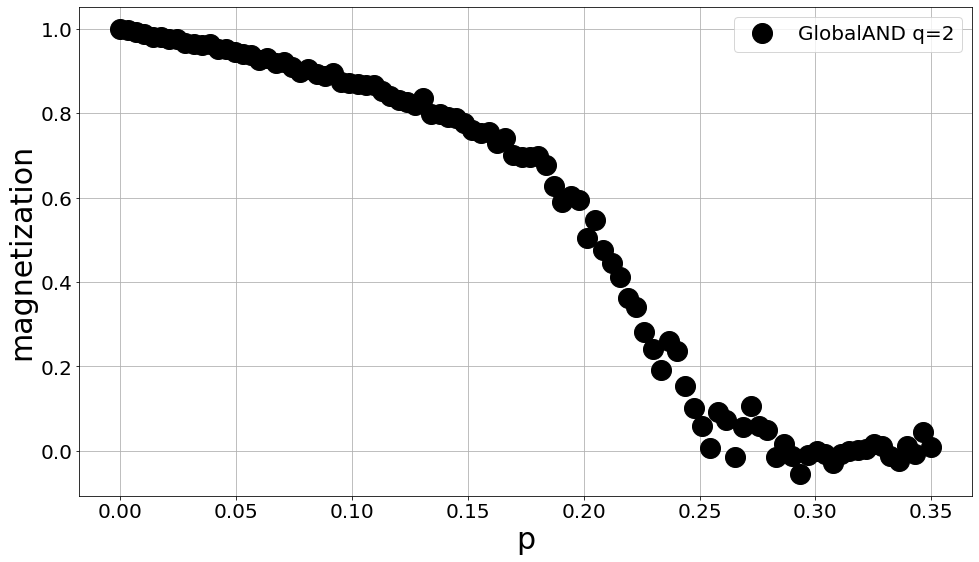

In [8]:
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(ps, monoplex_magnetization, markersize=20, marker='o', linewidth=0, color='black', label='GlobalAND q=2')
plt.xlabel('p', fontsize=30)
plt.ylabel('magnetization', fontsize=30)
plt.grid()

plt.legend(prop={'size': 20})

## Multilayer network (case: 2 layers)

In [9]:
def spinson_conformity_flip(Gs, colors, spinson, q):
    neighbours = []
    for graph in Gs:
        neighbours.extend(random.sample(list(graph.neighbors(spinson)), q))
    opinion = colors[neighbours[0]]
    same_opinion = True
    for spinson_neighbour in neighbours:
        if opinion == colors[spinson_neighbour] and same_opinion == True:
            same_opinion = True
        else:
            same_opinion = False

    if same_opinion == True:
        colors[spinson] = opinion

    return colors

In [10]:
def q_voter_simulation(Gs, p, q, iterations):
    magnetization = []
        
    colors = ['#0000ff'] * len(Gs[0].nodes())
    for i in range(iterations):
        for i in range(len(Gs[0])):
            spinson = random.choice(list(Gs[0].nodes()))  #  chooses one random node
            if random.random() < p:  #  does it act independtly? 
                if random.random() < 0.5:  # the same probability to change opinion
                    colors = spinson_independent_flip(Gs, colors, spinson)
            else:
                colors = spinson_conformity_flip(Gs, colors, spinson, q)

        magnetization.append((-1*colors.count('#ff0000') + 1*colors.count('#0000ff'))/len(Gs[0]))  # calculates magnetizations substituting 1 or -1 in a proper way
    
    return magnetization

In [11]:
def calculate_average_magnetization_final(Gs, ps, q, mc):
    magnetizations = []
    for j in trange(len(ps)):  
        magnetization = np.zeros(mc)
        for i in range(mc):    
            magnetization = magnetization + q_voter_simulation(Gs, ps[j], q, mc)
        magnetizations.append(magnetization[-1]/mc)
        
    return magnetizations

In [12]:
Gs = [nx.complete_graph(100), nx.complete_graph(100)]
mc = 100
q = 2
ps = np.linspace(0, 0.35, 100)

In [13]:
two_layers_magnetization = calculate_average_magnetization_final(Gs, ps, q, mc)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [30:49<00:00, 18.49s/it]


In [14]:
magn_global_and = [1.0,
 0.9970000000000003,
 0.9936,
 0.9873999999999999,
 0.9837999999999998,
 0.9791999999999998,
 0.9771999999999998,
 0.9753999999999995,
 0.9699999999999998,
 0.9649999999999995,
 0.9612000000000002,
 0.9567999999999997,
 0.9543999999999998,
 0.9513999999999996,
 0.9455999999999996,
 0.9413999999999993,
 0.9351999999999998,
 0.9313999999999997,
 0.9194000000000001,
 0.9241999999999999,
 0.9192000000000001,
 0.9184000000000002,
 0.9076000000000003,
 0.8985999999999998,
 0.8978000000000003,
 0.8956000000000002,
 0.8926000000000002,
 0.8796000000000004,
 0.8704000000000001,
 0.8715999999999998,
 0.8592000000000003,
 0.8564000000000003,
 0.8554,
 0.8420000000000001,
 0.8369999999999999,
 0.8419999999999997,
 0.8325999999999998,
 0.8289999999999997,
 0.8146000000000002,
 0.8075999999999999,
 0.7919999999999999,
 0.7726,
 0.7803999999999999,
 0.7680000000000001,
 0.7435999999999998,
 0.7355999999999999,
 0.7482,
 0.7225999999999999,
 0.7099999999999997,
 0.7088000000000002,
 0.6838000000000002,
 0.6826000000000002,
 0.6325999999999997,
 0.6335999999999998,
 0.6466000000000001,
 0.5855999999999999,
 0.5833999999999999,
 0.5575999999999999,
 0.5821999999999999,
 0.5436,
 0.47999999999999976,
 0.4138,
 0.44580000000000003,
 0.33299999999999996,
 0.2718,
 0.23959999999999992,
 0.19520000000000004,
 0.23159999999999997,
 0.19539999999999996,
 0.19739999999999994,
 0.10340000000000005,
 0.07619999999999999,
 0.07960000000000002,
 0.0842,
 0.09020000000000004,
 0.0558,
 0.08259999999999999,
 0.0262,
 0.034,
 0.03960000000000001,
 0.013600000000000001,
 -0.01800000000000001,
 -0.010199999999999997,
 -0.04839999999999999,
 -0.03380000000000001,
 -0.0176,
 -0.004999999999999985,
 -0.0228,
 0.00019999999999999838,
 -0.03280000000000001,
 -0.015200000000000005,
 0.02240000000000001,
 0.0236,
 -0.010199999999999997,
 -0.036999999999999984,
 0.0386,
 -0.030600000000000013,
 0.022600000000000012,
 0.014399999999999998,
 -0.013600000000000003]

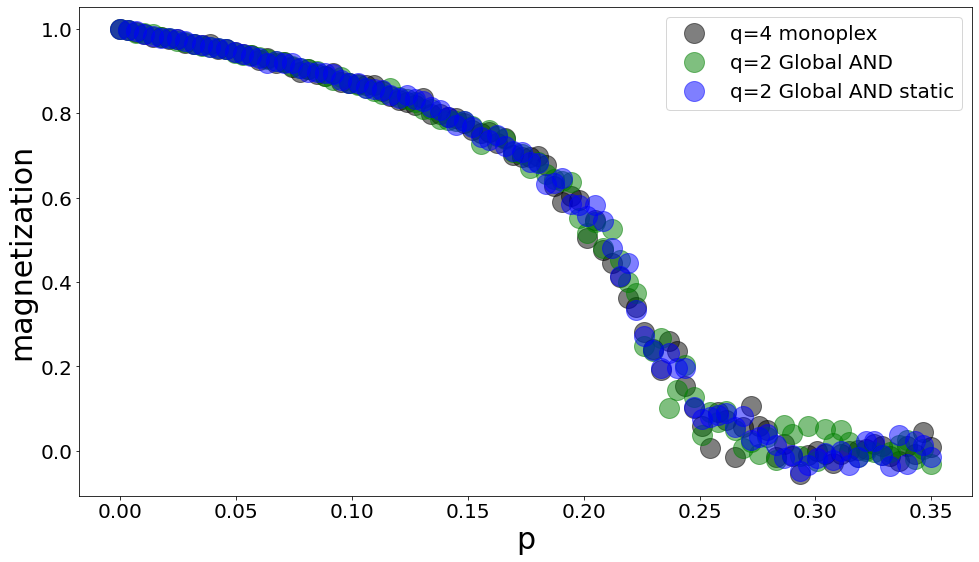

In [15]:
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(ps, monoplex_magnetization, markersize=20, marker='o', linewidth=0, color='black', label='q=4 monoplex', alpha=0.5)
plt.plot(ps, two_layers_magnetization, markersize=20, marker='o', linewidth=0, color='green', label='q=2 Global AND', alpha=0.5)
plt.plot(ps, magn_global_and, markersize=20, marker='o', linewidth=0, color='blue', label='q=2 Global AND static', alpha=0.5)
plt.xlabel('p', fontsize=30)
plt.ylabel('magnetization', fontsize=30)
plt.grid

plt.legend(prop={'size': 20})